### Results Summary
Using 10% increase threshold
1. Scree Plot- Choose Top 16 components (0-15)
2. PCQC-90: Choose Top 14 Components (0-13), note PC21 is in the top '14' for this ranking.
3. PCQC-95: Choose Top 18 Components (0-17)
4. Kruskal-Wallis: Unclear, Pvalues could be top 20-60; Log p-value ratios, mid 30's
5. Permutation Test: Statistical significance, top 31.  Practical significance: top 24. (0-23)  

In [1]:
import sys
sys.path.append('../pcqc')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pcqc import *
from kruskal_best_pcs import *

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
output_plots = 'plots/pca_plots.pdf'

In [4]:
plot_dictionary = dict()

### Get Polished Data

In [5]:
cbmc_df = pd.read_csv('data/filtered_cbmc_assay.csv')
cbmc_df.index = cbmc_df['Unnamed: 0']
cbmc_df.drop(columns = 'Unnamed: 0',inplace = True)
cbmc_df = cbmc_df.transpose()
cbmc_df.head()

Unnamed: 0,A4GALT,ABCB10,ABCC3,ABCG2,ABI3,AC002454.1,AC004381.6,AC004791.2,AC005339.2,AC005356.1,...,MOUSE-Rtn4,MOUSE-Ppp1ca,MOUSE-Cald1,MOUSE-Rps26,MOUSE-Ctsl,MOUSE-Tnfrsf12a,MOUSE-Esd,MOUSE-Acta2,MOUSE-Arpc2,MOUSE-Calr
CTGTTTACACCGCTAG,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.666522,2.806501,4.390655,2.338495,4.236169,3.291269,3.338256,1.181500,3.575336,2.491014
CTCTACGGTGTGGCTC,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.431149,3.219714,3.572171,3.176395,3.501385,3.099354,3.375631,3.738814,3.165883,2.803176
AGCAGCCAGGCTCATT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.810213,3.309678,3.658060,3.236889,3.957931,3.465798,2.787275,2.762576,3.510315,3.762173
GAATAAGAGATCCCAT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.686728,3.248412,3.565898,3.485953,3.325856,2.842990,3.483046,2.815389,3.319044,4.037947
GTGCATAGTCATGCAT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.561990,3.678177,4.183636,3.325419,2.450436,2.636636,1.886444,6.334562,3.971224,2.929176


In [6]:
pca = PC_Cluster(n_pcs = 100)
pca.fit(cbmc_df.values)
pca.norm_eigenvalues[0:20]

array([0.06562919, 0.03916874, 0.02691411, 0.01778673, 0.01531372,
       0.01340929, 0.01227411, 0.0069056 , 0.00643235, 0.00514619,
       0.00342394, 0.00324247, 0.00302587, 0.00232158, 0.00222412,
       0.00214154, 0.001905  , 0.00181226, 0.00176268, 0.00166096])

In [7]:
pca.singular_values[0:40]

array([868.95295056, 671.30139796, 556.46486991, 452.37205407,
       419.74751803, 392.78109022, 375.78791519, 281.86983478,
       272.03996754, 243.32710581, 198.47716244, 193.14613423,
       186.58335143, 163.43284719, 159.96552011, 156.96792325,
       148.04542448, 144.39681656, 142.40815718, 138.23778985,
       136.1151185 , 133.40114625, 131.55387147, 129.87040203,
       127.96288203, 127.17933396, 125.48905784, 124.00006504,
       122.98194909, 122.92517486, 122.35573268, 120.94851116,
       120.85115102, 120.30471171, 119.68894365, 119.60308555,
       119.28672034, 119.14001671, 118.64576421, 118.11438032])

### Run pcqc to identify top pcs

In [8]:
pca = PC_Cluster(n_pcs = 100)
pca.fit(cbmc_df.values)
pca.norm_eigenvalues[0:20]

array([0.06562919, 0.03916874, 0.02691411, 0.01778673, 0.01531372,
       0.01340929, 0.01227411, 0.0069056 , 0.00643235, 0.00514619,
       0.00342394, 0.00324247, 0.00302587, 0.00232158, 0.00222412,
       0.00214154, 0.001905  , 0.00181226, 0.00176268, 0.00166096])

In [9]:
pca.pc_distribution()
pca.df_pca_dist.head()

,PC_Dist_0,PC_Dist_1,PC_Dist_2,PC_Dist_3,PC_Dist_4,PC_Dist_5,PC_Dist_6,PC_Dist_7,PC_Dist_8,PC_Dist_9,...,PC_Dist_90,PC_Dist_91,PC_Dist_92,PC_Dist_93,PC_Dist_94,PC_Dist_95,PC_Dist_96,PC_Dist_97,PC_Dist_98,PC_Dist_99
0,0.000109,1.017151e-06,3.472080e-08,1.432048e-08,5.050533e-09,1.319299e-07,4.266750e-08,2.720950e-08,2.365754e-10,3.106800e-08,...,2.198981e-09,1.751499e-08,2.922613e-11,2.244439e-09,5.922574e-09,1.228976e-08,4.705107e-09,1.509249e-09,1.960247e-09,2.843155e-09
1,0.000106,1.330582e-06,4.509797e-07,9.829682e-10,4.407147e-08,1.592044e-06,2.385236e-07,3.358053e-08,5.075646e-09,1.728385e-08,...,9.969644e-10,2.087265e-09,8.196951e-09,2.109240e-09,4.168864e-08,2.796389e-08,5.889346e-11,5.691022e-09,1.084981e-09,4.350326e-09
2,0.000112,1.352623e-06,2.310197e-07,2.536909e-08,2.595612e-08,3.811017e-07,1.088577e-10,1.922921e-08,3.803947e-08,2.003366e-09,...,2.840543e-09,2.023886e-08,1.010993e-12,2.542236e-08,3.257220e-09,9.102833e-09,4.732683e-08,1.206457e-08,1.393310e-10,4.298715e-09
3,0.000108,1.341827e-06,1.159750e-07,2.082525e-08,2.928377e-08,4.010636e-07,3.102027e-10,6.158710e-09,1.380496e-10,7.409330e-13,...,1.377265e-08,3.063582e-10,5.103592e-09,2.295113e-09,9.564528e-09,4.424484e-10,3.092323e-09,7.237929e-09,1.433666e-08,2.075092e-10
4,0.000102,9.337392e-07,2.459761e-07,2.138715e-10,6.602527e-08,2.070620e-07,1.215814e-10,2.952202e-09,2.365325e-08,2.340283e-08,...,2.689249e-10,4.261099e-09,5.340679e-09,1.173059e-08,2.289973e-08,2.751366e-09,2.644236e-08,4.734207e-08,2.013404e-09,4.568171e-09


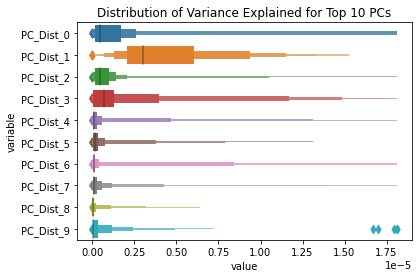

In [13]:
pc_distplot(pca, cols = np.arange(0,10))
plt.title('Distribution of Variance Explained for Top 10 PCs')
plot_dictionary['Boxenplot'] = plt.gca().get_figure()

In [15]:
pca.pc_stats()

In [151]:
pca.df_pc_stats.head(20).sort_values(by = '90.0_Percentile',ascending = False)

,85.0_Percentile,90.0_Percentile,95.0_Percentile,evalue,rank
PC_Dist_1,8.601626e-06,1.014885e-05,1.210442e-05,0.039169,2.0
PC_Dist_3,2.813921e-06,7.694347e-06,1.292536e-05,0.017787,4.0
PC_Dist_0,2.311926e-06,2.936726e-06,9.714711e-05,0.065629,1.0
PC_Dist_2,1.285693e-06,1.547341e-06,2.749509e-06,0.026914,3.0
PC_Dist_9,9.158598e-07,1.511348e-06,3.181929e-06,0.005146,10.0
PC_Dist_5,5.801629e-07,1.427605e-06,5.020880e-06,0.013409,6.0
PC_Dist_4,4.296442e-07,9.569372e-07,6.487841e-06,0.015314,5.0
PC_Dist_7,4.446319e-07,7.045018e-07,1.570855e-06,0.006906,8.0
PC_Dist_16,3.702320e-07,6.042770e-07,1.083304e-06,0.001905,17.0
PC_Dist_15,4.147513e-07,5.718364e-07,9.152589e-07,0.002142,16.0


In [149]:
pca.df_pc_stats.sort_values(by = '90.0_Percentile',ascending = False).head(20)

,85.0_Percentile,90.0_Percentile,95.0_Percentile,evalue,rank
PC_Dist_1,8.601626e-06,1.014885e-05,1.210442e-05,0.039169,2.0
PC_Dist_3,2.813921e-06,7.694347e-06,1.292536e-05,0.017787,4.0
PC_Dist_0,2.311926e-06,2.936726e-06,9.714711e-05,0.065629,1.0
PC_Dist_2,1.285693e-06,1.547341e-06,2.749509e-06,0.026914,3.0
PC_Dist_9,9.158598e-07,1.511348e-06,3.181929e-06,0.005146,10.0
PC_Dist_5,5.801629e-07,1.427605e-06,5.020880e-06,0.013409,6.0
PC_Dist_4,4.296442e-07,9.569372e-07,6.487841e-06,0.015314,5.0
PC_Dist_7,4.446319e-07,7.045018e-07,1.570855e-06,0.006906,8.0
PC_Dist_16,3.702320e-07,6.042770e-07,1.083304e-06,0.001905,17.0
PC_Dist_15,4.147513e-07,5.718364e-07,9.152589e-07,0.002142,16.0


In [150]:
def compute_gap(df, var_name):
    nrows = df.shape[0]
    df = df.sort_values(by = var_name,ascending = False).reset_index()
    ratios = np.divide(df.loc[0:nrows-2,var_name].values,df.loc[1:nrows-1,var_name].values)
    #print(ratios[0:18])
    top_args = np.argsort(-1*ratios)
    top_gaps = -1*np.sort(-1*ratios)
    gap_stats = pd.DataFrame(top_args, columns = ['args'])
    gap_stats['gaps'] = top_gaps
    return gap_stats

In [20]:
gap_stats = compute_gap(pca.df_pc_stats,'evalue')
gap_stats[0:15]

,args,gaps
0,6,1.777413
1,0,1.675550
2,2,1.513157
3,9,1.503003
4,1,1.455324
5,12,1.303368
6,8,1.249926
7,3,1.161489
8,4,1.142024
9,15,1.124170


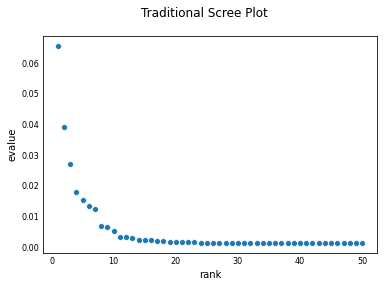

In [28]:
scatter_scree_plot(pca)
plot_dictionary['Traditional Scree Plot'] = plt.gca().get_figure()

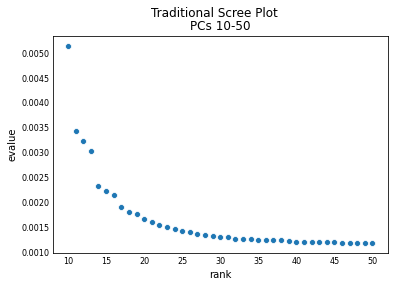

In [29]:
scatter_scree_plot(pca, rank = np.arange(10,51))
plt.title('PCs 10-50')
plot_dictionary['Traditional Scree Plot, 10-50'] = plt.gca().get_figure()

From scree plot with original criteria, should choose top 16 components (0-15).  

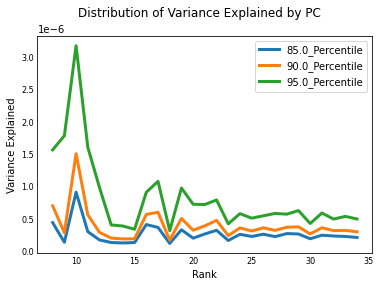

In [30]:
fig = dist_var_pc_plot(pca, rank = np.arange(8,35))
plot_dictionary['PCQC_NotSorted'] = plt.gca().get_figure()

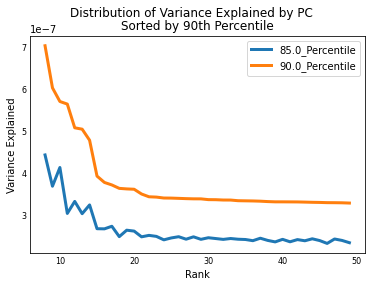

In [41]:
fig = sorted_dist_var_pc_plot(pca, rank = np.arange(8,50), sort_var = '90.0_Percentile', max_subset_size = 2)
plt.title('Sorted by 90th Percentile')
plot_dictionary['PCQC_Sorted'] = plt.gca().get_figure()

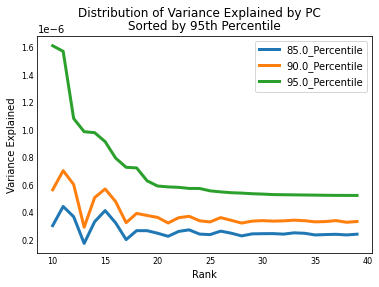

In [45]:
fig = sorted_dist_var_pc_plot(pca, rank = np.arange(10,40), sort_var = '95.0_Percentile', max_subset_size = 3)
plt.title('Sorted by 95th Percentile')
plot_dictionary['PCQC_Sortedv2'] = plt.gca().get_figure()

In [32]:
gap_stats = compute_gap(pca.df_pc_stats,'90.0_Percentile')
gap_stats[0:15]

,args,gaps
0,1,2.620042
1,2,1.897918
2,5,1.491849
3,6,1.358318
4,0,1.319001
5,13,1.216478
6,95,1.188360
7,7,1.165859
8,10,1.110851
9,94,1.104463


In [156]:
gap_stats = compute_gap(pca.df_pc_stats,'95.0_Percentile')
gap_stats[0:15]

,args,gaps
0,0,7.499445
1,3,1.865708
2,5,1.577936
3,7,1.536119
4,10,1.450059
5,4,1.292172
6,6,1.157272
7,14,1.150289
8,17,1.148752
9,97,1.144803


* __PCQC-90 choose top 14 components (0-13)__. Note top 14 components in this ranking includes PC 21.
* __PCQC-95 choose top 18 components (0-17)__

In [154]:
pca.df_pc_stats.sort_values(by = '95.0_Percentile',ascending = False).head(20)

,85.0_Percentile,90.0_Percentile,95.0_Percentile,evalue,rank
PC_Dist_0,2.311926e-06,2.936726e-06,9.714711e-05,0.065629,1.0
PC_Dist_6,3.048251e-07,5.059515e-07,1.295391e-05,0.012274,7.0
PC_Dist_3,2.813921e-06,7.694347e-06,1.292536e-05,0.017787,4.0
PC_Dist_1,8.601626e-06,1.014885e-05,1.210442e-05,0.039169,2.0
PC_Dist_4,4.296442e-07,9.569372e-07,6.487841e-06,0.015314,5.0
PC_Dist_5,5.801629e-07,1.427605e-06,5.020880e-06,0.013409,6.0
PC_Dist_9,9.158598e-07,1.511348e-06,3.181929e-06,0.005146,10.0
PC_Dist_2,1.285693e-06,1.547341e-06,2.749509e-06,0.026914,3.0
PC_Dist_8,1.406752e-07,2.863070e-07,1.789906e-06,0.006432,9.0
PC_Dist_10,3.054692e-07,5.656790e-07,1.611368e-06,0.003424,11.0


From PCQC, Top 15 or so should work well

In [36]:
pca.select_top_pcs(criteria = 'evalue', n_top_pcs = 100)

In [37]:
reduced_matrix = pca.use_top_pcs()

In [38]:
reduced_matrix.shape

(8617, 100)

### What about Kruskal?

In [51]:
def compute_best_pcs(reduced_matrix, n_neighbors, resolution, threshold = 1e-6, max_discard = 20):
    #max discard, max number of pcs that are discarded in a single round 
    df = pd.DataFrame(reduced_matrix)
    finished = False
    index = 0
    while not finished:
        adata = sc.AnnData(X = reduced_matrix)
        sc.pp.neighbors(adata, n_neighbors = n_neighbors, use_rep = 'X')
        sc.tl.leiden(adata, resolution = resolution, random_state = np.random.randint(100))
        df['Clusters'] = adata.obs['leiden'].values
        valid_cols = [col for col in df.columns if col != 'Clusters']
        kruskal_test, best_pcs = pc_kruskal_test(df,valid_cols, threshold = threshold)
        candidates_to_elim = np.where(np.array(kruskal_test) > threshold)
        #get max discard lowest values
        #print(kruskal_test)
        #print(candidates_to_elim)
        
        lowest_values = np.argsort(-1*np.array(kruskal_test))[0:max_discard]
        #print(lowest_values)
        to_discard = []
        for value in lowest_values:
            if kruskal_test[value] > threshold:
                to_discard.append(value)
        #print(to_discard)
        to_keep = [col for i,col in enumerate(df.columns) if i not in to_discard]
        if len(to_discard) == 0:
            finished = True
        else:
            df = df[to_keep]
            reduced_matrix = df.values
        
    return df,kruskal_test

In [52]:
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)

In [55]:
np.sum(np.array(kruskal) < 1e-4)

50

In [63]:
def pvalue_plot(pvalues, 
                thresholds = ['1e-2','1e-3','1e-4','1e-5', 
                              '1e-6','1e-9','1e-12','1e-15','1e-20','1e-40']):
    df = pd.DataFrame(columns = ['threshold','count'])
    pvalues = np.array(pvalues)
    for i,thresh in enumerate(thresholds):
        num_thresh = float(thresh)
        count = np.sum(pvalues < num_thresh)
        df.loc[i] = [thresh,count]
    return df

In [64]:
df = pvalue_plot(kruskal)

In [65]:
df

,threshold,count
0,1e-2,58
1,1e-3,52
2,1e-4,50
3,1e-5,47
4,1e-6,44
5,1e-9,35
6,1e-12,33
7,1e-15,29
8,1e-20,27
9,1e-40,21


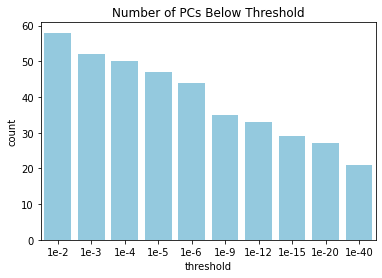

In [71]:
sns.barplot(df['threshold'],df['count'], color = 'skyblue', order = df['threshold'])
plt.title('Number of PCs Below Threshold')
plot_dictionary['KruskalPvalueSig'] = plt.gca().get_figure()

In [53]:
kruskal

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.586625752460789e-256,
 3.893799430910165e-216,
 5.9126970356642015e-152,
 2.0729246571642135e-124,
 3.599765701060328e-22,
 5.949681609198862e-123,
 2.207448825705088e-102,
 4.252862155975075e-21,
 7.779977830155383e-108,
 2.3783034741255712e-25,
 1.438618059533406e-102,
 2.7219180611230044e-104,
 7.589991088717241e-31,
 2.385756361018867e-32,
 5.29662869191387e-85,
 1.0424843981130629e-80,
 1.205114265234982e-26,
 4.951138437941867e-08,
 0.01783186708738348,
 9.441453993713618e-14,
 1.7870767771554045e-13,
 0.3418775738204001,
 5.062726110953775e-15,
 8.343678813942524e-05,
 4.099534528084501e-07,
 7.025280198741594e-19,
 0.006925698295600785,
 8.329369083972229e-11,
 5.132891636750893e-05,
 0.13004381446710395,
 0.00020118501777497514,
 0.8831016983739958,
 3.606145946274065e-08,
 0.0016309190411091603,
 0.053021272947255976,
 0.8299019864356363,
 0.005546619760587362,
 0.08347054828445209,
 0.5585498439673122,
 0.2582178

In [73]:
y = np.log10(np.array(kruskal)+1e-300)

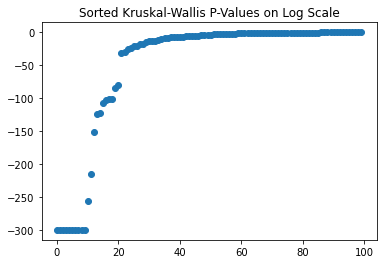

In [74]:
#good threshold would be between 1e-50
plt.title('Sorted Kruskal-Wallis P-Values on Log Scale')
plt.scatter(x = np.arange(len(y)), y = np.sort(y))
plot_dictionary['KruskalWallisPvalueLogScale'] = plt.gca().get_figure()

In [79]:
np.abs(pd.DataFrame(y))

,0
0,300.000000
1,300.000000
2,300.000000
3,300.000000
4,300.000000
...,...
95,0.323977
96,7.014584
97,1.223877
98,5.014463


In [158]:
gap_stats = compute_gap(np.abs(pd.DataFrame(y)), 0)
gap_stats[0:15]

,args,gaps
0,98,2.709765
1,20,2.529283
2,95,1.692958
3,96,1.499801
4,93,1.445267
5,11,1.424401
6,28,1.258690
7,12,1.222704
8,90,1.220904
9,72,1.217354


In [159]:
gap_stats[0:30]

,args,gaps
0,98,2.709765
1,20,2.529283
2,95,1.692958
3,96,1.499801
4,93,1.445267
5,11,1.424401
6,28,1.258690
7,12,1.222704
8,90,1.220904
9,72,1.217354


It appears Top 20 will work.  Below we provide some code to identify elbow.  By assuming the ratio of successive points follows a common distribution.  Also added the a fraction of the median to stabilize the computation

In [81]:
ratios = []
sorted_y = np.sort(y)
for i,value in enumerate(sorted_y):
    if i < len(y)-1:
        ratio = sorted_y[i]/(sorted_y[i+1]+.1*np.median(sorted_y))
        ratios.append(ratio)

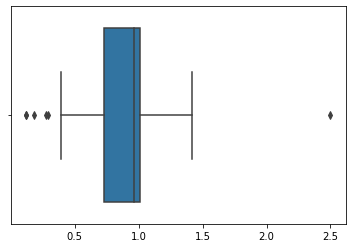

In [82]:
#ratios are ideal as distribution is now on same scale and can detect outliers (elbows) more easily
#ratios are bad when denominator is close to 0.  Assumption is that at least half are bad.  
#So median should be much smaller than the elbow. Just put a fraction of median in denominator. 
#Can alternatively specify what min pvalue is that we want.
sns.boxplot(ratios)

In [83]:
def find_outliers(ratios):
    iqr = pd.Series(ratios).quantile(.75) - pd.Series(ratios).quantile(.25)
    boundary = pd.Series(ratios).quantile(.75) + 2*iqr
    outliers = []
    for i,value in enumerate(ratios):
        if value > boundary:
            outliers.append((i,value))
    return outliers

In [84]:
outliers = find_outliers(ratios)

In [85]:
outliers

[(20, 2.4985665863213473)]

### Automated Elbow Detection is Hard
1. https://raghavan.usc.edu//papers/kneedle-simplex11.pdf
2. https://stackoverflow.com/questions/2018178/finding-the-best-trade-off-point-on-a-curve
3. https://stackoverflow.com/questions/4471993/compute-the-elbow-for-a-curve-automatically-and-mathematically

### Can also perform Kruskal Test on PCQC to Ensure We Selected Good PCs

In [86]:
pca.select_top_pcs(criteria = '90.0_Percentile', n_top_pcs = 15)
reduced_matrix = pca.use_top_pcs()

In [87]:
adata_pcqc = sc.AnnData(X = reduced_matrix)

In [88]:
df_pcqc = pd.DataFrame(adata_pcqc.X)

In [89]:
sc.pp.neighbors(adata_pcqc, use_rep = 'X', n_neighbors = 15)
sc.tl.leiden(adata_pcqc, resolution = .8)

In [90]:
df_pcqc['Clusters'] = adata_pcqc.obs['leiden'].values

In [91]:
kruskal_test, best_pcs = pc_kruskal_test(df_pcqc,np.arange(15), threshold = 1e-9)

In [92]:
kruskal_test

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

### Try a Permutation Test

In [93]:
import importlib

In [94]:
import kruskal_best_pcs

In [95]:
importlib.reload(kruskal_best_pcs)

<module 'kruskal_best_pcs' from '../pcqc/kruskal_best_pcs.py'>

In [96]:
mtrx = cbmc_df.values

In [97]:
#kind of slow
perm_test = permutation_test(mtrx, trials = 20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [98]:
#top permuted eigenvalues
sorted_svalues = -1*np.sort(-1*perm_test.max())

In [99]:
#anywhere between 19 and 31
np.sum(pca.singular_values > sorted_svalues)

31

In [100]:
pca.singular_values - sorted_svalues

array([ 7.41892053e+02,  5.44952589e+02,  4.30481088e+02,  3.26583737e+02,
        2.94158352e+02,  2.67398200e+02,  2.50591667e+02,  1.56853028e+02,
        1.47154846e+02,  1.18480658e+02,  7.39247301e+01,  6.87461578e+01,
        6.22721839e+01,  3.93000084e+01,  3.59395605e+01,  3.31587020e+01,
        2.43181378e+01,  2.07222439e+01,  1.89426835e+01,  1.49068967e+01,
        1.29010813e+01,  1.02960176e+01,  8.62241229e+00,  7.02819133e+00,
        5.22601479e+00,  4.59015742e+00,  3.01490241e+00,  1.57011502e+00,
        6.70764172e-01,  7.30819793e-01,  2.77786938e-01, -9.99817958e-01,
       -1.01998192e+00, -1.43306736e+00, -1.96938963e+00, -1.98986251e+00,
       -2.16755230e+00, -2.25753582e+00, -2.65977273e+00, -3.10657322e+00,
       -3.01322029e+00, -3.27366098e+00, -3.33168072e+00, -3.26751279e+00,
       -3.54077007e+00, -3.75823659e+00, -3.73137070e+00, -3.78075250e+00,
       -3.85676443e+00, -3.96348250e+00, -4.02676126e+00, -4.08305856e+00,
       -4.00588616e+00, -

In [101]:
def compute_e_ratio(svalues,perm):
    answer = np.divide(svalues,perm)
    df = pd.DataFrame(answer,columns = ['E_Ratio'])
    return df

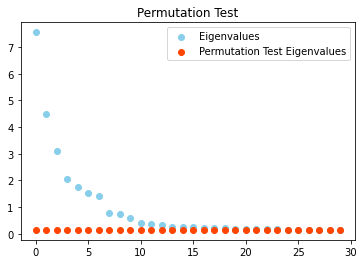

In [127]:
plt.scatter(x = np.arange(0,30), y = 1e-5*np.power(pca.singular_values[0:30],2), color = 'skyblue', label = 'Eigenvalues')
plt.scatter(x = np.arange(0,30), y = 1e-5*np.power(sorted_svalues[0:30],2), color = 'orangered', 
            label = 'Permutation Test Eigenvalues')
plt.legend()
plt.title('Permutation Test')
plot_dictionary['PermTest'] = plt.gca().get_figure()

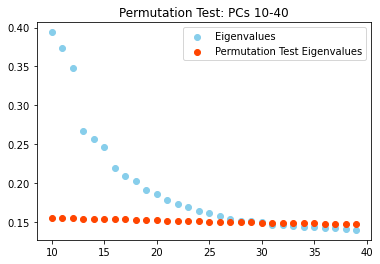

In [128]:
plt.scatter(x = np.arange(10,40), y = 1e-5*np.power(pca.singular_values[10:40],2), color = 'skyblue', label = 'Eigenvalues')
plt.scatter(x = np.arange(10,40), y = 1e-5*np.power(sorted_svalues[10:40],2), color = 'orangered', 
            label = 'Permutation Test Eigenvalues')
plt.legend()
plt.title('Permutation Test: PCs 10-40')
plot_dictionary['PermTestPcs10-40'] = plt.gca().get_figure()

In [110]:
sorted_svalues

array([127.06089724, 126.34880879, 125.98378234, 125.78831663,
       125.58916634, 125.38289039, 125.19624824, 125.01680724,
       124.88512133, 124.84644789, 124.55243231, 124.39997643,
       124.3111675 , 124.13283884, 124.02595964, 123.80922128,
       123.72728664, 123.67457269, 123.46547368, 123.33089314,
       123.21403722, 123.1051287 , 122.93145918, 122.8422107 ,
       122.73686724, 122.58917654, 122.47415544, 122.42995001,
       122.31118491, 122.19435507, 122.07794574, 121.94832912,
       121.87113294, 121.73777906, 121.65833328, 121.59294806,
       121.45427265, 121.39755252, 121.30553694, 121.22095355,
       121.07430014, 120.95657694, 120.88713832, 120.75741877,
       120.7438012 , 120.59258451, 120.48970748, 120.41737981,
       120.34255534, 120.23451973, 120.16004906, 120.08862723,
       119.95405514, 119.90819402, 119.82461403, 119.76466499,
       119.67413899, 119.55210521, 119.51338071, 119.38584432,
       119.34996467, 119.23282223, 119.14942727, 119.04

In [103]:
sorted_medians = -1*np.sort(-1*perm_test.median())
e_ratio = compute_e_ratio(pca.singular_values,sorted_medians)
e_ratio[0:25]

,E_Ratio
0,6.876759
1,5.325671
2,4.423288
3,3.601884
4,3.347906
5,3.137986
6,3.006036
7,2.258176
8,2.182247
9,1.954107


### To Make Units Comparable- Need to Square Values

In [119]:
np.power(e_ratio,2)[0:30]

,E_Ratio
0,47.289809
1,28.362771
2,19.565476
3,12.973565
4,11.208472
5,9.846958
6,9.036255
7,5.099358
8,4.762202
9,3.818534


In [36]:
from scipy.sparse.linalg import svds
_,s,_ = svds(mtrx,k=100)
evalues = np.power(s,2)

In [38]:
s

array([116.15764684, 116.24035985, 116.32742199, 116.43555419,
       116.50495378, 116.62133365, 116.6980604 , 116.72454465,
       116.84796214, 116.95337439, 117.00082035, 117.06941761,
       117.09978664, 117.19680068, 117.32530658, 117.3523605 ,
       117.38278068, 117.5088929 , 117.56549055, 117.6303358 ,
       117.64846639, 117.75809994, 117.87097826, 117.94156805,
       118.00310832, 118.15254335, 118.17638787, 118.23192194,
       118.27016584, 118.44251165, 118.51784191, 118.54670734,
       118.60932362, 118.69891713, 118.74815791, 118.94155956,
       118.99782771, 119.03765853, 119.13908102, 119.21319988,
       119.24968   , 119.39302543, 119.48042017, 119.59915035,
       119.69636021, 119.80345489, 119.8263692 , 119.96116368,
       120.02681549, 120.13372792, 120.21997177, 120.25665839,
       120.31801001, 120.43507361, 120.5083087 , 120.54422548,
       120.62771929, 120.74157758, 120.8411597 , 121.04893364,
       121.14212556, 121.24341902, 121.30511164, 121.42

In [37]:
evalues

array([13492.59891956, 13511.82125858, 13532.06910594, 13557.2382799 ,
       13573.40425633, 13600.53546324, 13618.43730171, 13624.61932413,
       13653.44625659, 13678.09178047, 13689.19196286, 13705.24853878,
       13712.36002998, 13735.09009064, 13765.22756338, 13771.57651414,
       13778.71719951, 13808.33991061, 13821.64456903, 13836.89590003,
       13841.16164467, 13866.97010246, 13893.56751705, 13910.21347338,
       13924.73357318, 13960.02350036, 13965.65865096, 13978.78736661,
       13987.83212762, 14028.62856637, 14046.47885141, 14053.32182079,
       14068.17164849, 14089.43292876, 14101.1250081 , 14147.09458999,
       14160.48299978, 14169.96414729, 14194.12062583, 14211.787026  ,
       14220.48618054, 14254.69452142, 14275.57080339, 14303.95676543,
       14327.21864661, 14352.86780347, 14358.35875499, 14390.68079174,
       14406.43643549, 14432.11258414, 14452.84161293, 14461.66388785,
       14476.42353348, 14504.60695649, 14522.25246571, 14530.91029623,
      

In [39]:
pca = PC_Cluster()

In [43]:
pca.fit(cbmc_df.values)

In [44]:
pca.norm_eigenvalues[0:20]

array([0.00139216, 0.00138224, 0.00137699, 0.00137014, 0.00136828,
       0.0013636 , 0.0013601 , 0.00135463, 0.00135166, 0.00134928,
       0.00134677, 0.00134208, 0.00133842, 0.0013358 , 0.00133295,
       0.00133252, 0.00132662, 0.00132342, 0.00132036, 0.0013175 ])

In [14]:
answer = 

array([-0.07575971, -0.07575971, -0.07575971, ..., -0.07575971,
       -0.07575971, -0.07575971])

In [15]:
np.random.permutation(mtrx[:,0])

array([-0.04300511, -0.04300511, -0.04300511, ..., -0.04300511,
       -0.04300511, -0.04300511])

### Export Plots

In [152]:
with PdfPages(output_plots) as pdf:
    for title in plot_dictionary.keys():
        pdf.savefig(plot_dictionary[title])